In [ ]:
# IMPORTANT!
# post zhien meeting- maybe this shouldn't be a priority. It seems that Zhien would rather have me focus on processing and
# plotting TDR data than worrying about rmw calculations.

In [1]:
# this code is a throwback to the rmw tests I was running a long time ago, but it harnesses the new, simpler
# pandas dataframe with all the separate passes saved! This should make testing much more flexible.

# two ways of defining the rmw: first, use the actual rmw calculated from fl wind profiles. 
# These are more accurate, but are also buggier and don't apply for every case (weaker TCs). 

# second, just take half and half of the data points: the further out half and the closer half. Divide each eye directly
# down the middle. This would apply to all tc cases, but is potentially inaccurate.

In [5]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import xarray as xr

# load all eye passes saved in local dataset
# passes = pd.read_pickle("/Users/etmu9498/research/data/all_metadata.pkl")
passes = pd.read_pickle("/Users/etmu9498/research/data/aa_paper_1_data/flight_heights_metadata.pkl")


# testing
# os.chdir("/Users/etmu9498/research/data/crl-all-data-processed/2021")
# crl = xr.open_dataset("P3_20210926H1_processed.nc")
# crl

In [2]:
passes

,flight,pass,times,radial dists,rmw,xdists,ydists,xdistsshear,ydistsshear,cloudheights,Defined Eyewalls,intensity,intensification,category,shearmag,sheardir
0,20210812H1,0,"[10.3293, 10.3298, 10.3304, 10.331, 10.3315, 1...","[50.758127406428926, 50.5215961477361, 50.2852...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[-48.58182423890883, -48.40518058572596, -48.1...","[14.620849279774982, 14.481689824627386, 14.31...","[1.9924102725583648, 2.066478574207369, 2.1548...","[-50.69510017100203, -50.48277442866824, -50.2...","[2267.6172646482933, 2291.554699488093, 2237.0...",False,30.0,5.0,td,18.7,109.0
1,20210812H1,1,"[11.0487, 11.0493, 11.0499, 11.0504, 11.051, 1...","[50.52321138406297, 50.34746734510243, 50.1724...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[47.04018566775289, 46.78009759359792, 46.5168...","[-18.258690621707828, -18.40988251690863, -18....","[1.9491447157734902, 2.1767758554648653, 2.408...","[50.42181755701473, 50.225122717898756, 50.026...","[5.000933609081812, 5.029412420559538, 4.99911...",False,30.0,5.0,td,18.7,109.0
2,20210812H1,2,"[12.5499, 12.5504, 12.551, 12.5515, 12.5521, 1...","[50.01986848943345, 49.76313305775235, 49.5062...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[6.4124873653557986, 6.416461079417937, 6.4164...","[-49.487216994248534, -49.252198094007454, -48...","[44.703381245757456, 44.47987279520905, 44.214...","[22.17458782577817, 22.101830376623994, 22.010...","[4.190304587110177, 3.989989305525569, 3.99558...",False,30.0,5.0,td,18.7,109.0
3,20210812H2,0,"[22.0919, 22.0925, 22.093, 22.0936, 22.0941, 2...","[50.81342780915665, 50.556889255609455, 50.298...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[-49.84500850845677, -49.58582834529812, -49.3...","[9.817068727605381, 9.709999896306083, 9.63038...","[-8.94565819312868, -8.843128986478913, -8.767...","[-50.00874834568813, -49.74773904816309, -49.5...","[2794.196958897944, 2805.6311848245227, 2804.5...",False,32.5,0.0,td,18.1,91.0
4,20210812H2,1,"[23.348, 23.3486, 23.3491, 23.3497, 23.3503, 2...","[50.33938831016191, 50.06149873146039, 49.7844...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[13.418348138184895, 13.248733857741547, 13.11...","[48.56527976616468, 48.30171469354675, 48.0824...","[-48.79206550424965, -48.52558039650902, -48.3...","[12.56872345755074, 12.403734854953834, 12.276...","[780.2338959195781, 790.1709355615117, 808.502...",False,32.5,0.0,td,18.1,91.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86,20221007H1,2,"[24.650082, 24.652859, 24.655636, 24.658415, 2...","[6.522741142962811, 7.6348249136518325, 8.7819...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[0.49700334256130524, 1.1373861614382825, 1.78...","[6.592850004441847, 7.654432201424754, 8.71622...","[-5.854425540123324, -7.094049493395109, -8.33...","[-3.072195485111209, -3.0916729114995527, -3.1...","[1111.0148829663613, 1220.6878287248473, 1117....",True,45.0,20.0,ts,11.0,122.0
87,20221008H1,0,"[22.1004, 22.1032, 22.106, 22.1088, 22.1115, 2...","[50.20738162864745, 49.142779919430346, 48.093...","[0.5422446181969152, 0.5307468159092764, 0.519...","[44.60126799126277, 43.211033806321005, 41.824...","[22.527469587594876, 22.86719191535007, 23.196...","[-37.826531572717855, -36.395407015038, -34.97...","[-32.64833076325087, -32.64163379664368, -32.6...","[2956.0792918382845, 2900.8721822394286, 2976....",True,65.0,10.0,wh,5.7,194.0
88,20221008H1,1,"[23.1588, 23.1616, 23.1643, 23.1671, 23.1699, ...","[39.519136517756806, 38.80114707075819, 38.104...","[0.4268105285999574, 0.4190561725485549, 0.411...","[-39.02864403529562, -38.31351509143257, -37.6...","[-0.4408240313199152, 0.5181772933068607, 1.44...","[37.7626815245117, 37.30079838488142, 36.85059...","[9.869613221332848, 8.766092984856941, 7.70147...","[2116.6850005316187, 2256.021048559471, 2145.5...",True,65.0,10.0,wh,5.7,194.0
89,20221008H1,2,"[24.32884, 24.331617, 24.334394, 24.337173, 24...","[49.80746243757303, 48.5945

20210818H1
20210818H1
20210818H1
20210821H2
20210821H2
20210821H2
20210827H1
20210827H1
20210827H1
20210827H1
20210828H1
20210829H1
20210925H1
20210926H1
20210926H1
20210926H1
20210927H1
20210927H1
20210927H1
20210929H2
20210929H2
20210929H2
20210929H2
20220908H1
20220908H1
20220918H1
20220918H1
20220918H1
20220918H1
20220918H1
20220920H1
20220920H1
20220920H1
20220920H1
20220926H1
20220926H1
20220926H1
20220926H1
20220927H1
20220927H1
20220927H1
20221008H1
20221008H1
20221008H1
20221008H1


Text(0.5, 1.0, 'Issue cases: rmw >1 within the TC eye... why?')

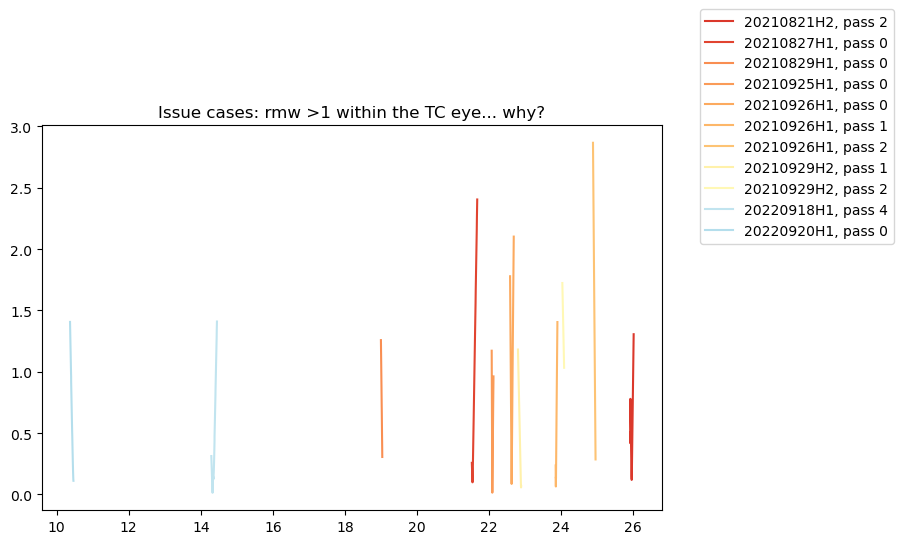

In [15]:
# print out the names of datasets with non nan rmws!
rmw_case_count = 0
for rmwi, rmws in enumerate(passes['rmw']):
    for rmwval in rmws:
        if ~ np.isnan(rmwval):
            print(passes['flight'][rmwi])
            rmw_case_count += 1
            break



# also, plot out the rmws vs time for this case!
plt.figure(figsize=(8,5))

# make unique colors for each pass / dataset
cmap = matplotlib.cm.get_cmap('RdYlBu')
evenly_spaced = np.linspace(0, 1, rmw_case_count).tolist()
rgblist = cmap(evenly_spaced)
# print(rgblist)

count = 0
for rmwi, rmws in enumerate(passes['rmw']):
    for rmwval in rmws:
        if ~ np.isnan(rmwval):
            
            # optional: only plot if rmw > 1 (weird cases)
            if np.nanmax(rmws) > 1:
                plt.plot(passes['times'][rmwi], rmws, c=rgblist[count], label=passes['flight'][rmwi] + ", pass " + str(passes['pass'][rmwi]))
            count += 1
            break
            
plt.legend(bbox_to_anchor=(1.05, 1.32))
plt.title("Issue cases: rmw >1 within the TC eye... why?")